## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import os
import albumentations as A
from albumentations.pytorch import ToTensor

import torch
import cv2

import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader


from sklearn import metrics, model_selection

%matplotlib inline

## Data

In [3]:
df = pd.read_csv("../input/cassava-leaf-disease-classification/train.csv") 

In [4]:
df

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4


0     1087
1     2189
2     2386
3    13158
4     2577
Name: label, dtype: int64

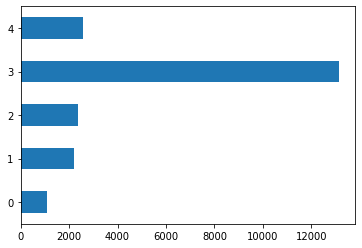

In [5]:
df.label.value_counts().sort_index().plot.barh()
df.label.value_counts().sort_index()

## Visualization According to Label(0,1,2,3,4)

In [6]:
label0_img = df[df['label']==0].image_id.values
label1_img = df[df['label']==1].image_id.values
label2_img = df[df['label']==2].image_id.values
label3_img = df[df['label']==3].image_id.values
label4_img = df[df['label']==4].image_id.values

In [7]:
img_path = '../input/cassava-leaf-disease-classification/train_images/'

label0_img_path = [os.path.join(img_path, x) for x in label0_img]
label1_img_path = [os.path.join(img_path, x) for x in label1_img]
label2_img_path = [os.path.join(img_path, x) for x in label2_img]
label3_img_path = [os.path.join(img_path, x) for x in label3_img]
label4_img_path = [os.path.join(img_path, x) for x in label4_img]

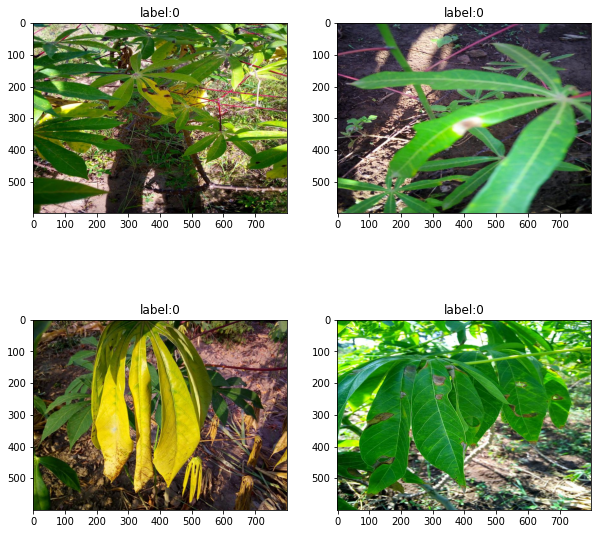

In [8]:
plt.figure(figsize=(10,10))

for i in range(4):
    
    plt.subplot(2,2,i+1)
        
    img = cv2.imread(label0_img_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title("label:0")
    plt.imshow(img)
    
plt.show()
        

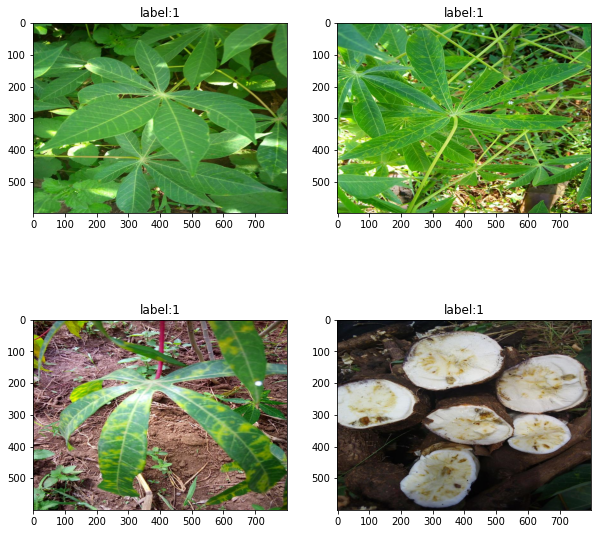

In [9]:
plt.figure(figsize=(10,10))

for i in range(4):
    
    plt.subplot(2,2,i+1)
        
    img = cv2.imread(label1_img_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title("label:1")
    plt.imshow(img)
    
plt.show()
        

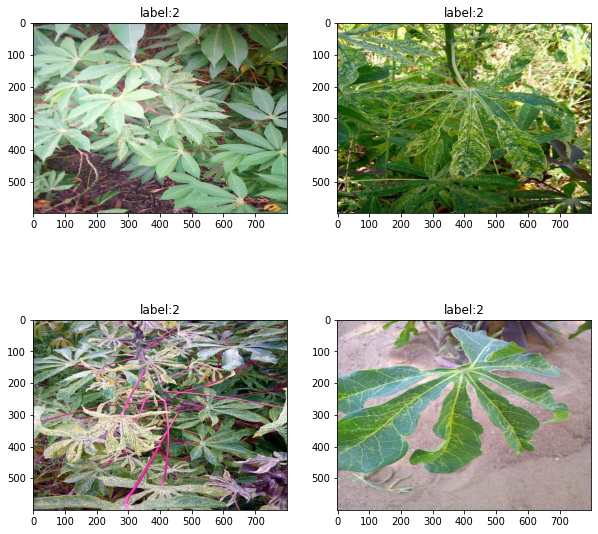

In [10]:
plt.figure(figsize=(10,10))

for i in range(4):
    
    plt.subplot(2,2,i+1)
        
    img = cv2.imread(label2_img_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title("label:2")
    plt.imshow(img)
    
plt.show()
        

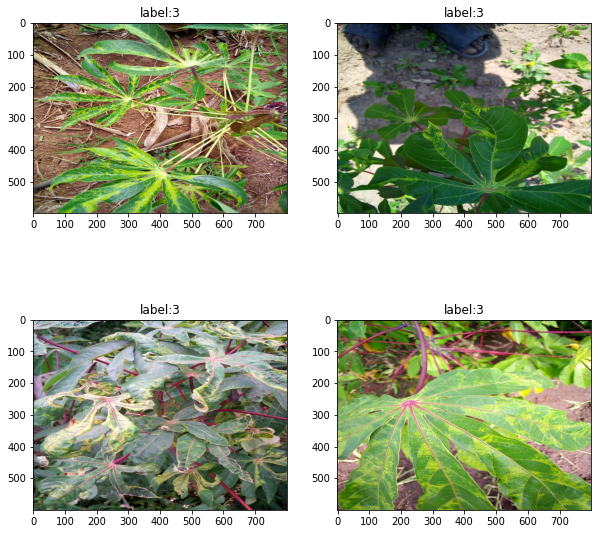

In [11]:
plt.figure(figsize=(10,10))

for i in range(4):
    
    plt.subplot(2,2,i+1)
        
    img = cv2.imread(label3_img_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title("label:3")
    plt.imshow(img)
    
plt.show()
        

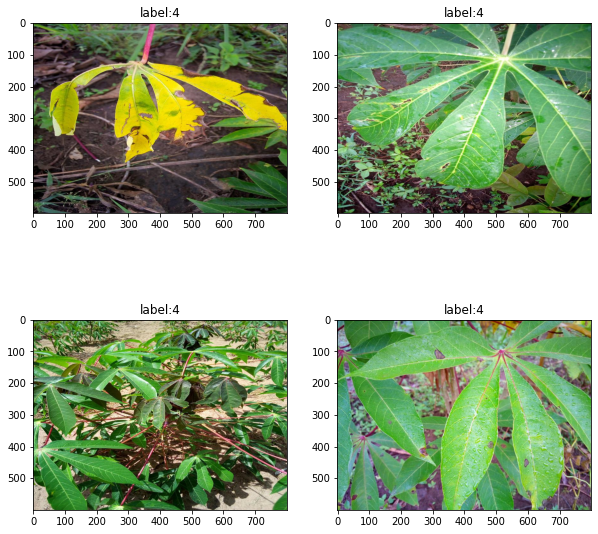

In [12]:
plt.figure(figsize=(10,10))

for i in range(4):
    
    plt.subplot(2,2,i+1)
        
    img = cv2.imread(label4_img_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title("label:4")
    plt.imshow(img)
    
plt.show()
        

## Split Train ,Val Data

In [13]:
df_train, df_val = model_selection.train_test_split(df, test_size=0.1, random_state=42, stratify=df.label.values)


In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [15]:
df_train.shape, df_val.shape

((19257, 2), (2140, 2))

In [16]:
img_path = '../input/cassava-leaf-disease-classification/train_images/'

train_img_path = [os.path.join(img_path, x) for x in df_train.image_id.values]
val_img_path = [os.path.join(img_path, x) for x in df_val.image_id.values]

In [17]:
len(train_img_path), len(val_img_path)

(19257, 2140)

In [18]:
train_target = df_train.label.values
val_target = df_val.label.values

## Define Dataset

In [19]:
class LeafDataset(Dataset):
    def __init__(self, img_ids, targets, transform):
        self.img_ids = img_ids
        self.targets = targets
        self.transform = transform
        
    def __len__(self):
        return len(self.img_ids)
    
    def __getitem__(self, index):
        img_id = self.img_ids[index]
        img = cv2.imread(img_id)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        target = self.targets[index]
        
        if self.transform is not None:
            img = self.transform(image=img)['image']
            
        return img, target
        

## Augumentation

In [20]:
train_transform = A.Compose([
    A.Rotate(15,p=0.2),
    A.VerticalFlip(p=0.2),
    A.HorizontalFlip(p=0.2),
    ToTensor()
])

val_transform=A.Compose([
    ToTensor()
])

In [21]:
train_dataset = LeafDataset(img_ids = train_img_path, targets = train_target, transform=train_transform)
val_dataset = LeafDataset(img_ids = val_img_path, targets = val_target, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)

In [22]:
len(train_dataset),len(val_dataset)

(19257, 2140)

## Resnet 34 Model

In [23]:
! pip install pretrainedmodels

     |████████████████████████████████| 58 kB 771 kB/s eta 0:00:01
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60963 sha256=230c6e402774ce5caca42372500a53be7f90e8d6228325d92303e6ca1a441b29
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built pretrainedmodels


In [24]:
import pretrainedmodels

model_name = 'resnet34'
model = pretrainedmodels.__dict__[model_name](pretrained='imagenet')

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [25]:
in_features = model.last_linear.in_features

In [26]:
model.last_linear = nn.Linear(in_features, len(np.unique(df.label.values)), bias=False)

In [27]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Optimizer, Loss, Lr_scheduler

In [28]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
loss_fn = nn.CrossEntropyLoss()

In [29]:
device = 'cuda' if torch.cuda.is_available else 'cpu'  

In [30]:
import gc
gc.collect()

36165

In [31]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score

## Train

In [32]:

best_score = -1

for epoch in tqdm_notebook(range(10)):
    model = model.to(device)
    model.train()
    train_loss=[]
    for inputs, outputs in train_dataloader:
        inputs = inputs.to(device)
        outputs = outputs.to(device)
        
        optimizer.zero_grad()
        
        logit = model(inputs)
        
        loss = loss_fn(logit, outputs)
        train_loss.append(loss.item())
        
        loss.backward()
        optimizer.step()
        
    val_loss=[]
    val_true=[]
    val_pred=[]
    
    model.eval()
    with torch.no_grad():
        for inputs, outputs in val_dataloader:
            inputs = inputs.to(device)
            outputs = outputs.to(device)
            
            logit = model(inputs)
            
            loss = loss_fn(logit, outputs)
            
            val_loss.append(loss.item())

            val_pred.append(np.argmax(logit.cpu().data.numpy(),axis=1))
            val_true.append(outputs.cpu().data.numpy())
        
    
    val_pred = np.concatenate(val_pred, axis=0)
    val_true = np.concatenate(val_true, axis=0)

    
    score = accuracy_score(val_pred, val_true)
    
    lr_scheduler.step(np.mean(val_loss))
    
    print(f" epoch: {epoch+1}, train_loss: {np.round(np.mean(train_loss),4)}, val_loss:{np.round(np.mean(val_loss),4)}, accuracy:{np.round(score,4)}")
    
    if score>best_score:
        best_score = score
        
        state_dict = model.cpu().state_dict()
        torch.save(state_dict, 'checkpoint.pth')
            
        
        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/10 [00:00<?, ?it/s]

 epoch: 1, train_loss: 0.8281, val_loss:0.6219, accuracy:0.7893
 epoch: 2, train_loss: 0.6193, val_loss:0.5891, accuracy:0.793
 epoch: 3, train_loss: 0.5594, val_loss:0.5897, accuracy:0.8019
 epoch: 4, train_loss: 0.5224, val_loss:0.5712, accuracy:0.8126
 epoch: 5, train_loss: 0.5019, val_loss:0.5615, accuracy:0.8103
 epoch: 6, train_loss: 0.4774, val_loss:0.4441, accuracy:0.8491
 epoch: 7, train_loss: 0.4732, val_loss:0.4803, accuracy:0.8252
 epoch: 8, train_loss: 0.451, val_loss:0.5362, accuracy:0.8224
Epoch     9: reducing learning rate of group 0 to 5.0000e-04.
 epoch: 9, train_loss: 0.4309, val_loss:0.5416, accuracy:0.8164
 epoch: 10, train_loss: 0.3811, val_loss:0.3988, accuracy:0.865


## Load Model's parameter 

In [ ]:
model = model.load_state_dict(torch.load('../input/cassava-leaf-disease-classification/checkpoint.pth'))

In [ ]:
submission = pd.read_csv('../input/cassava-leaf-disease-classification/sample_submission.csv')

In [ ]:
submission

## Test Image Classification 

In [ ]:
test_image_path = '../input/cassava-leaf-disease-classification/test_images/2216849948.jpg'

In [ ]:
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255


In [ ]:
img = torch.FloatTensor(img)
img = img.permute(1,2,0)
img = img.to(device)

result = model(img)

